# Analysis of Patient Appointment Data to check factors that affect not showing up for appointments using Pandas

### Context of the Project

#### It is common for patients to book their medical appoinment and after receiving all the instructions missing their scheduled appointment which incurs cost on the healthcare system.

#### Anlayzing No-Show data for medical appointments can help healthcare systems to decide interventions in future such as reminder calls for the appointments, reschedule an appointment and in turn reduce the financial loss.

#### The project has exploratory data analysis performed on medical appointments for healthcare systems in Brazil city.

### Dataset

#### The Kaggle dataset comprised of 110527 medical appointments with its 14 associated variables (characteristics) across 6 weeks of timeline in 2016. The dataset can be found on https://www.kaggle.com/joniarroba/noshowappointments/home

### Dataset Description
#### 01 - Patient_Id : Identification of a patient
#### 02 - Appointment_Id : Identification of each appointment
#### 03 - Gender : Male or Female ('M' or 'F')
#### 04 - Scheduled_Day : The day someone called or registered the appointment
#### 05 - Appointment_Day : The day of the actual appointment
#### 06 - Age : How old is the patient
#### 07 - Neighbourhood : Where the appointment takes place
#### 08 - Scholarship : True of False (1 or 0) Detailed Description about the characteristic can be found on https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia
#### 09 - Hypertension : True or False (1 or 0) 
#### 10 - Diabetes : True or False (1 or 0) 
#### 11 - Alcoholism : True or False (1 or 0) 
#### 12 - Handicap : True or False (1 or 0) 
#### 13 - SMS_Received : 1 or more messages sent to the patient
#### 14 - Appointment_Status : No-Show or Show

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot,iplot_mpl,download_plotlyjs,enable_mpl_offline
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the input file
medical_appointments = pd.read_csv("csv_file/NoShow_Appointment_Details_May_2016.csv")

In [3]:
# Displaying random sample data from dataframe
medical_appointments.sample(n = 5) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
25109,4.727613e+12,5672041,F,2016-05-09T07:33:03Z,2016-05-24T00:00:00Z,14,ANDORINHAS,0,0,0,0,0,1,Yes
52003,9.442262e+11,5747307,M,2016-05-30T15:27:08Z,2016-05-31T00:00:00Z,24,MATA DA PRAIA,0,0,0,0,0,0,No
8381,2.243684e+14,5640992,M,2016-04-29T11:58:00Z,2016-05-02T00:00:00Z,50,SEGURANÇA DO LAR,0,0,0,0,0,1,No
57075,9.818925e+14,5664420,F,2016-05-05T12:12:25Z,2016-05-09T00:00:00Z,9,CENTRO,0,0,0,0,0,0,Yes
11536,6.539432e+13,5715305,F,2016-05-18T14:05:00Z,2016-05-19T00:00:00Z,20,MONTE BELO,0,0,0,0,0,0,No


In [4]:
# Renaming the columns
medical_appointments.rename(columns = {'PatientId': 'Patient_Id',
                                      'AppointmentID': 'Appointment_Id',
                                      'ScheduledDay' : 'Scheduled_Day',
                                      'AppointmentDay' : 'Appointment_Day',
                                      'Hipertension':'Hypertension',
                                      'Handcap' : 'Handicap',
                                      'SMS_received':'SMS_Received',
                                      'No-show':'Appointment_Status'}, inplace = True) 

In [5]:
# Identifying the unique values for certain columns
print('Gender: ', sorted(medical_appointments.Gender.unique()))
print('Age: ', sorted(medical_appointments.Age.unique()))
print('Scholarship: ', sorted(medical_appointments.Scholarship.unique()))
print('Hypertension: ', sorted(medical_appointments.Hypertension.unique()))
print('Diabetes: ', sorted(medical_appointments.Diabetes.unique()))
print('Alcoholism: ', sorted(medical_appointments.Alcoholism.unique()))
print('Handicap: ', sorted(medical_appointments.Handicap.unique()))
print('SMS Received: ', sorted(medical_appointments.SMS_Received.unique()))
print('No Show Appointment Status: ', sorted(medical_appointments.Appointment_Status.unique()))

Gender:  ['F', 'M']
Age:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship:  [0, 1]
Hypertension:  [0, 1]
Diabetes:  [0, 1]
Alcoholism:  [0, 1]
Handicap:  [0, 1, 2, 3, 4]
SMS Received:  [0, 1]
No Show Appointment Status:  ['No', 'Yes']


In [6]:
# Checking the concise summary of the dataframe  : Observation 1
medical_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Patient_Id          110527 non-null  float64
 1   Appointment_Id      110527 non-null  int64  
 2   Gender              110527 non-null  object 
 3   Scheduled_Day       110527 non-null  object 
 4   Appointment_Day     110527 non-null  object 
 5   Age                 110527 non-null  int64  
 6   Neighbourhood       110527 non-null  object 
 7   Scholarship         110527 non-null  int64  
 8   Hypertension        110527 non-null  int64  
 9   Diabetes            110527 non-null  int64  
 10  Alcoholism          110527 non-null  int64  
 11  Handicap            110527 non-null  int64  
 12  SMS_Received        110527 non-null  int64  
 13  Appointment_Status  110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
medical_appointments.head()

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Appointment_Status
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Dataset Observations:

#### 1. The dataset consists of 13 independent variables and Appointment_Status (No-Show) is the dependent variable.
#### 2. The datatype of Patient_Id column should be integer but it is float.
#### 3. The datatype of Scheduled_Day and Appointment_Day columns should be datetime.
#### 4. Appointment_Day has hours specififed as 00:00:00. As a result, it is difficult to determine whether the hour of the appointment has effect on Appointment_Status column.
#### 5. Age column has some outliers. 
#### 6. The dataset does not have any records with NaN values.
#### 7. The day difference between the Scheduled_Day and Appointment_Day can be calculated to determine whether this was a factor for no show appointments.
#### 8. Analyzing how no show appointments are distributed among Day_of_Week can help to improve less no show appointments.

### Converting Patient_Id column datatype into Integer

In [8]:
# Fetching all the records with Patient_Id which is non integer value (Float values)
medical_appointments_non_integer_ids = medical_appointments[~ medical_appointments.Patient_Id.apply(lambda x: x.is_integer())]
medical_appointments_non_integer_ids

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Appointment_Status
3950,93779.52927,5712759,F,2016-05-18T09:12:29Z,2016-05-18T00:00:00Z,33,CENTRO,0,0,0,0,0,0,No
73228,537615.28476,5637728,F,2016-04-29T07:19:57Z,2016-05-06T00:00:00Z,14,FORTE SÃO JOÃO,0,0,0,0,0,1,No
73303,141724.16655,5637648,M,2016-04-29T07:13:36Z,2016-05-02T00:00:00Z,12,FORTE SÃO JOÃO,0,0,0,0,0,0,No
100517,39217.84439,5751990,F,2016-05-31T10:56:41Z,2016-06-03T00:00:00Z,44,PRAIA DO SUÁ,0,0,0,0,0,0,No
105430,43741.75652,5760144,M,2016-06-01T14:22:58Z,2016-06-01T00:00:00Z,39,MARIA ORTIZ,0,0,1,0,0,0,No


In [9]:
# Fetching Float values of Patient_Id in a list
non_integer_patient_ids = medical_appointments_non_integer_ids['Patient_Id'].values.tolist()

# Converting the float Patient_Ids to Integer and checking if the same Patient_Id exists
for i in range(len(non_integer_patient_ids)):
    non_integer_patient_ids[i] = int(non_integer_patient_ids[i])
    if medical_appointments.query('Patient_Id == {}'.format(non_integer_patient_ids[i])).empty:
        print('Patient Id {} does not exists'.format(non_integer_patient_ids[i]))
    else:
        print('Patient Id {} exists'.format(non_integer_patient_ids[i]))

Patient Id 93779 does not exists
Patient Id 537615 does not exists
Patient Id 141724 does not exists
Patient Id 39217 does not exists
Patient Id 43741 does not exists


In [10]:
# Converting Patient_Id from Float to Integer
medical_appointments['Patient_Id'] = medical_appointments['Patient_Id'].astype('int64')
medical_appointments.dtypes

Patient_Id             int64
Appointment_Id         int64
Gender                object
Scheduled_Day         object
Appointment_Day       object
Age                    int64
Neighbourhood         object
Scholarship            int64
Hypertension           int64
Diabetes               int64
Alcoholism             int64
Handicap               int64
SMS_Received           int64
Appointment_Status    object
dtype: object

### Removing Age column outliers

In [11]:
# Removing outliers in Age column
medical_appointments = medical_appointments[(medical_appointments['Age']>=0) & (medical_appointments['Age']<100)]

### Changing the values in Apppointment Status Column

In [12]:
medical_appointments['Appointment_Status'] = medical_appointments['Appointment_Status'].map({'Yes': 'No-Show', 'No': 'Show'})
medical_appointments.sample(n=5)

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Appointment_Status
97482,18257766298474,5767069,M,2016-06-02T16:25:50Z,2016-06-07T00:00:00Z,67,JARDIM CAMBURI,0,1,1,0,0,1,Show
11856,28868232328725,5640213,M,2016-04-29T10:15:54Z,2016-05-06T00:00:00Z,54,SANTO ANDRÉ,0,1,1,0,0,0,Show
95053,6682567846399,5718212,F,2016-05-19T09:05:30Z,2016-06-06T00:00:00Z,11,ILHA DO PRÍNCIPE,0,0,0,0,0,1,No-Show
15602,84171675649722,5643312,F,2016-05-02T07:19:33Z,2016-05-04T00:00:00Z,38,BOA VISTA,0,1,1,0,0,0,Show
105182,191429662147955,5761677,M,2016-06-02T06:53:13Z,2016-06-06T00:00:00Z,34,BONFIM,0,0,0,0,0,1,Show


### Converting Scheduled_Day and Appointment_Day column Datatype into Datetime

In [13]:
# Convert the Scheduled_Day and Appointment_Day into datetime
medical_appointments['Scheduled_Day'] = pd.to_datetime(medical_appointments['Scheduled_Day']).dt.date.astype('datetime64[ns]')
medical_appointments['Appointment_Day'] = pd.to_datetime(medical_appointments['Appointment_Day']).dt.date.astype('datetime64[ns]')
medical_appointments.dtypes

Patient_Id                     int64
Appointment_Id                 int64
Gender                        object
Scheduled_Day         datetime64[ns]
Appointment_Day       datetime64[ns]
Age                            int64
Neighbourhood                 object
Scholarship                    int64
Hypertension                   int64
Diabetes                       int64
Alcoholism                     int64
Handicap                       int64
SMS_Received                   int64
Appointment_Status            object
dtype: object

### Calculating Waiting Days between Scheduled_Day and Appointment_Day column 

In [14]:
medical_appointments['Waiting_Days'] = (medical_appointments.Appointment_Day - medical_appointments.Scheduled_Day).dt.days
medical_appointments

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Appointment_Status,Waiting_Days
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Show,0
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Show,0
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Show,0
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Show,0
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Show,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,Show,35
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,Show,35
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,Show,41
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,Show,41


### Identifying Appointment's Day of Week and Appointment's Month 

In [15]:
medical_appointments['Appointment_Day_of_Week'] = medical_appointments.Appointment_Day.dt.day_name()
medical_appointments['Appointment_Month'] = medical_appointments['Appointment_Day'].dt.month
medical_appointments

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Appointment_Status,Waiting_Days,Appointment_Day_of_Week,Appointment_Month
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Show,0,Friday,4
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Show,0,Friday,4
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Show,0,Friday,4
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Show,0,Friday,4
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Show,0,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,Show,35,Tuesday,6
110523,3596266328735,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,Show,35,Tuesday,6
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,Show,41,Tuesday,6
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,Show,41,Tuesday,6


In [16]:
# Identifying the unique values for Appointment Day of Week and Month
print('Appointment Day of Week: ', sorted(medical_appointments.Appointment_Day_of_Week.unique()))
print('Appointment Month: ', sorted(medical_appointments.Appointment_Month.unique()))

Appointment Day of Week:  ['Friday', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday']
Appointment Month:  [4, 5, 6]


#### Dataset displays medical appointments for the month of April, May and June 2016.
#### All the appointments are scheduled on all days of week except Sunday.

In [17]:
# Displaying the data statistics
medical_appointments.describe()

,Patient_Id,Appointment_Id,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Waiting_Days,Appointment_Month
count,1.105150e+05,1.105150e+05,110515.000000,110515.000000,110515.000000,110515.000000,110515.000000,110515.000000,110515.000000,110515.000000,110515.000000
mean,1.474906e+14,5.675302e+06,37.082242,0.098276,0.197258,0.071873,0.030403,0.022196,0.321042,10.183866,5.210026
std,2.560860e+14,7.129649e+04,23.100482,0.297689,0.397931,0.258278,0.171695,0.161391,0.466879,15.255299,0.473773
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,4.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,3.172848e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000
75%,9.439172e+13,5.725518e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,5.000000
max,9.999816e+14,5.790484e+06,99.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,6.000000


#### Observations
#### 1. The average age of patients is 37 years. 25 % of patients are below 18 and 75 % of them are below 55.
#### 2. Handicap criteria is represented by four categories.
#### 3. SMS was sent to 75 % of people for their appointments.
#### 4. On an avergae waiting days between scheduled day and actual appointment day were 10. The highest waiting days were 179.
#### For 50 % of the patients waiting days were 4 while 75 % of the patients waited for 15 days to get an appointment.
#### There was atleast one case where the waiting days were 6 days prior to the day appointment was scheduled which needs to be investigated.


#### Histograms for the Features 

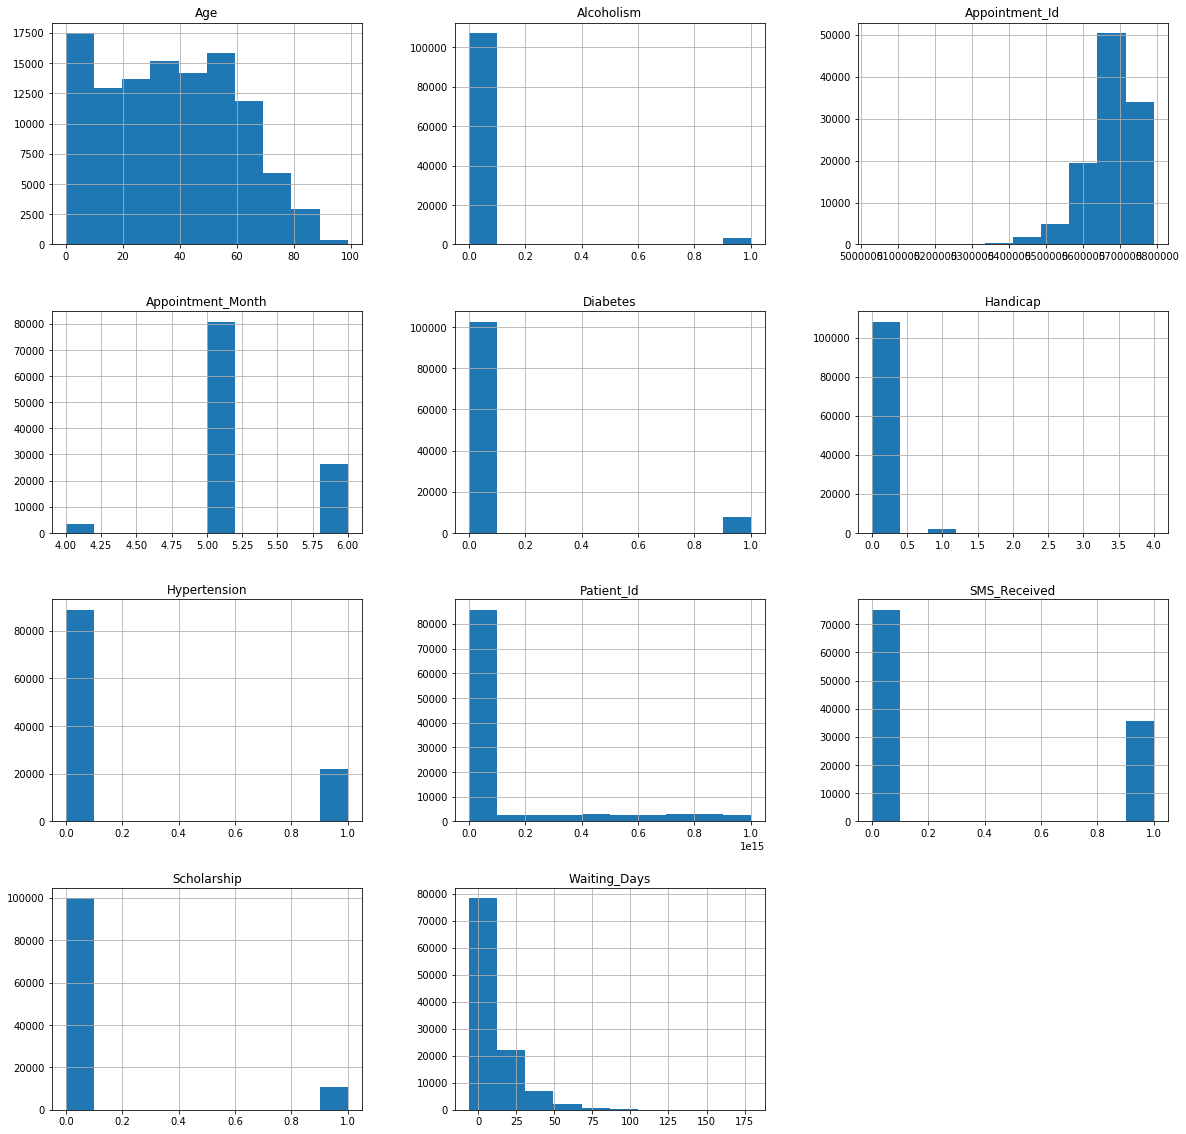

In [18]:
medical_appointments.hist(figsize=(20,20));

#### Observations
#### 1. There are more number of young people in the appointment dataset. 
#### Patient age distribution is even. There are less people with age above 60.
#### 2. There are less number of people who are alcoholic or have diabetes or handicap or have hypertension.
#### 3. Number of appointments in the month of May were highest followed by June and April.
#### 4. For more than 30000 appointments SMS was received by patients.
#### 5. Most of the patients did not have scholarship
#### 6. Number of appointments with waiting days between 0 to 25 are significant

### Exploratory Data Analysis

### 1. Percentage of the appointment data with No Show appointment

In [19]:
appointment_status = medical_appointments['Appointment_Status'].value_counts()
print(appointment_status)

Show       88199
No-Show    22316
Name: Appointment_Status, dtype: int64


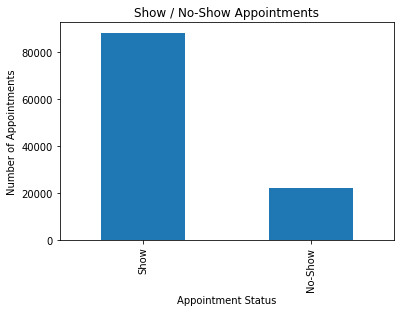

In [20]:
# Displaying bar plot for Show/ No-Show appointments
appointment_status.plot.bar()
plt.xlabel('Appointment Status')
plt.ylabel('Number of Appointments')
plt.title('Show / No-Show Appointments')
plt.show()

In [21]:
# Percentage of No-Show Appointment as compared to total number of appointments
percent_no_show = (appointment_status[1]/ appointment_status.sum()) * 100
print('Percentage of Patients not showing to appointment : {}%'.format(round(percent_no_show,2)))

Percentage of Patients not showing to appointment : 20.19%


#### Out of all the appointment data about 20% of the appointments were No-Show appointments. 
#### The reason can be awaiting days between the scheduled day to the actual appointment day,a ppointment was on weekend (Saturday) or whether that is the holiday. 
#### In order to identify what leads to No-Show appointment, I have performed further analysis

### 2. Features based probability calculation for not showing up for an appointment

In [22]:
# Function for calculating no show probability of an appointment
def no_show_probability(dataset,category_split):
    appointments = pd.crosstab(index = dataset[category_split],columns = dataset.Appointment_Status).reset_index()
    appointments['No_Show_Probability'] = appointments['No-Show']/(appointments['Show']+appointments['No-Show'])
    return appointments[[category_split,'No_Show_Probability']]

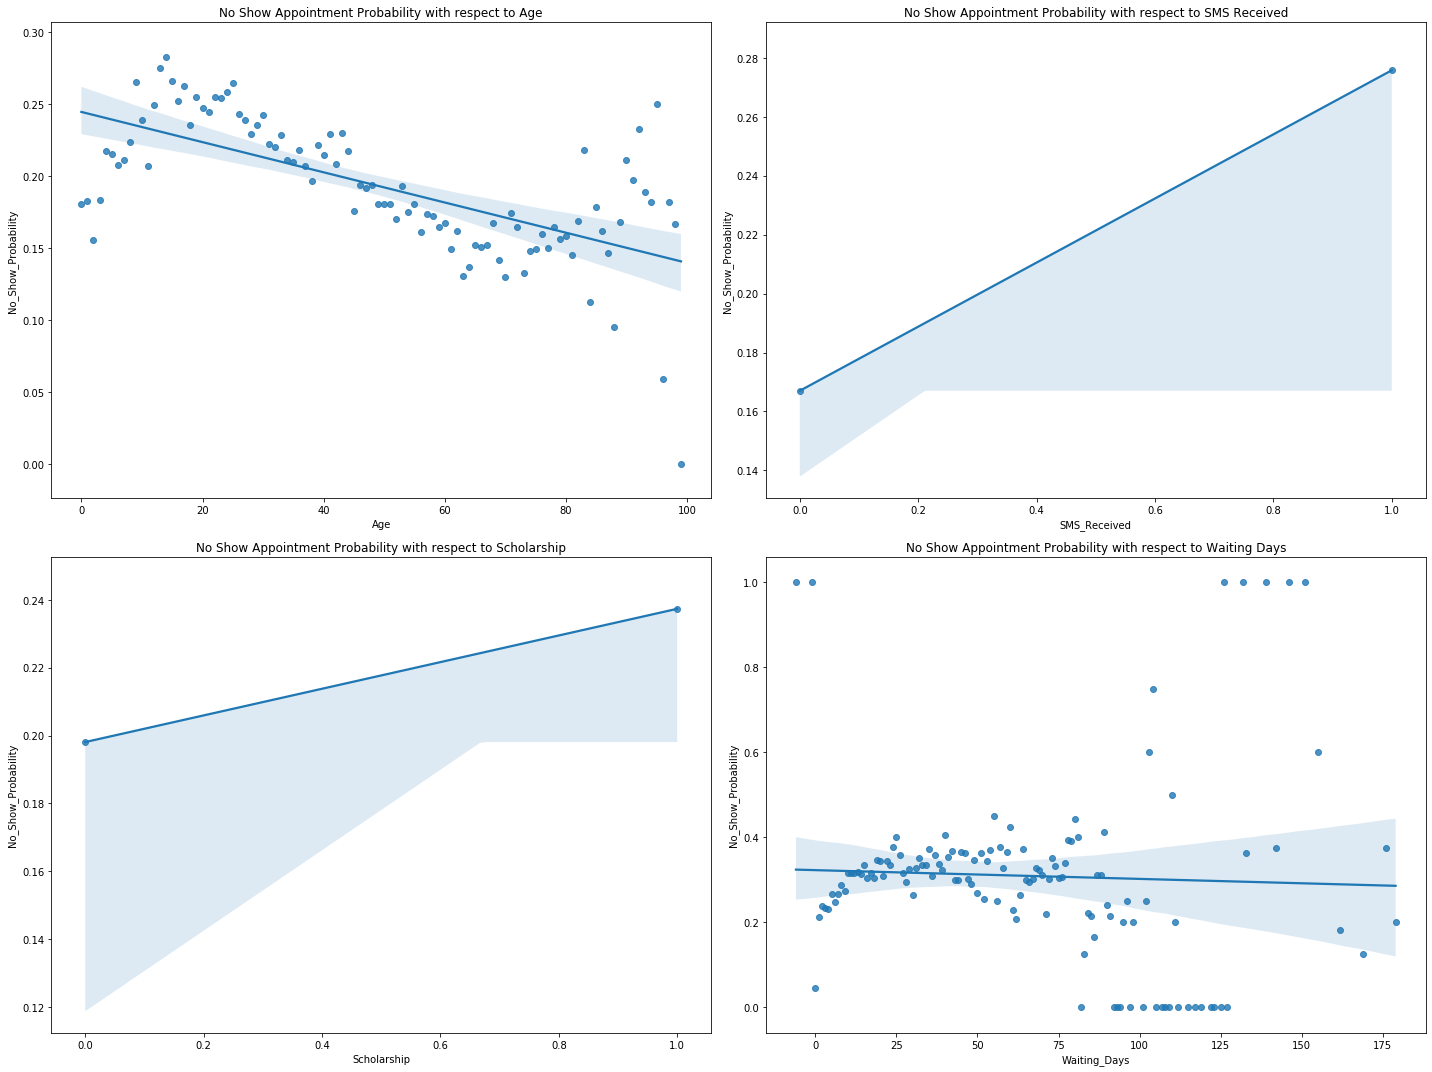

In [23]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(2,2,1)
plt.title('No Show Appointment Probability with respect to Age')
sns.regplot(data = no_show_probability(medical_appointments,'Age'),x = 'Age',y = 'No_Show_Probability',ax=ax1)

ax2 = fig.add_subplot(2,2,2)
plt.title('No Show Appointment Probability with respect to SMS Received')
sns.regplot(data = no_show_probability(medical_appointments,'SMS_Received'),x = 'SMS_Received',y = 'No_Show_Probability',ax=ax2)

ax3 = fig.add_subplot(2,2,3)
plt.title('No Show Appointment Probability with respect to Scholarship')
sns.regplot(data = no_show_probability(medical_appointments,'Scholarship'),x = 'Scholarship',y = 'No_Show_Probability',ax=ax3)

ax4 = fig.add_subplot(2,2,4)
plt.title('No Show Appointment Probability with respect to Waiting Days')
sns.regplot(data = no_show_probability(medical_appointments,'Waiting_Days'),x = 'Waiting_Days',y = 'No_Show_Probability',ax=ax4)

plt.tight_layout()
plt.show()

#### Observations
#### No-Show Probability has decreasing trend as the age increases. 
#### This shows that young adults have high rate of No-Show as compared to old adults.
#### No-Show probability is less when the waiting days are less than 25

### 3. Gender Based No-Show appointment analysis

In [24]:
# Patient appointments with No-Show appointment status
no_show_appointments = medical_appointments[(medical_appointments.Appointment_Status == 'No-Show')]
no_show_appointments

,Patient_Id,Appointment_Id,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_Received,Appointment_Status,Waiting_Days,Appointment_Day_of_Week,Appointment_Month
6,733688164476661,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,No-Show,2,Friday,4
7,3449833394123,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,No-Show,2,Friday,4
11,7542951368435,5620163,M,2016-04-26,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,No-Show,3,Friday,4
17,14794966191172,5633460,F,2016-04-28,2016-04-29,40,CONQUISTA,1,0,0,0,0,0,No-Show,1,Friday,4
20,622257462899397,5626083,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No-Show,2,Friday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,513364984676544,5772155,F,2016-06-03,2016-06-07,45,BARRO VERMELHO,0,0,0,0,0,0,No-Show,4,Tuesday,6
110492,645634214296344,5786741,M,2016-06-08,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,No-Show,0,Wednesday,6
110496,85442954737999,5779046,F,2016-06-06,2016-06-08,37,MARIA ORTIZ,0,1,0,0,0,0,No-Show,2,Wednesday,6
110515,645634214296344,5778621,M,2016-06-06,2016-06-08,33,MARIA ORTIZ,0,1,0,0,0,0,No-Show,2,Wednesday,6


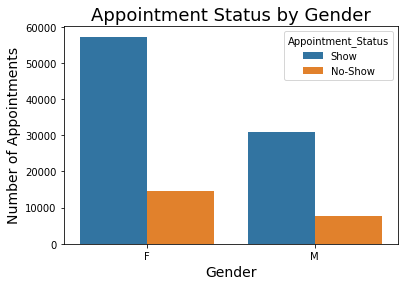

In [25]:
graph = sns.countplot(x='Gender',hue='Appointment_Status',data=medical_appointments)
plt.title('Appointment Status by Gender', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Appointments', fontsize=14)
plt.show()

In [26]:
medical_appointments_by_female = len(medical_appointments.loc[medical_appointments['Gender'] == "F"])
medical_appointments_by_male = len(medical_appointments.loc[medical_appointments['Gender'] == "M"])

no_show_female_appointments = len(medical_appointments.query('Gender == "F" and Appointment_Status == "No-Show"'))
no_show_male_appointments  = len(medical_appointments.query('Gender == "M" and Appointment_Status == "No-Show"'))

no_show_female_ratio = int(round(no_show_female_appointments/medical_appointments_by_female*100))
no_show_male_ratio = int(round(no_show_male_appointments/medical_appointments_by_male*100))

print('{} appointments were registered by females, {} appointments were missed by females with the ratio of {}%'.format(medical_appointments_by_female, no_show_female_appointments, no_show_female_ratio))
print('{} appointments were registered by males, {} appointments were missed by males with the ratio of {}%'.format(medical_appointments_by_male, no_show_male_appointments, no_show_male_ratio))

71830 appointments were registered by females, 14591 appointments were missed by females with the ratio of 20%
38685 appointments were registered by males, 7725 appointments were missed by males with the ratio of 20%


#### The number of appointments registered by Females are twice as that of males. 
#### However, the percentage of females and males who do not show up for appointments are 20%
#### It can not be concluded confirmly that the No-Show status of appointment is based on Gender

### 4. Show and No-Show Appointment distribution over a Week

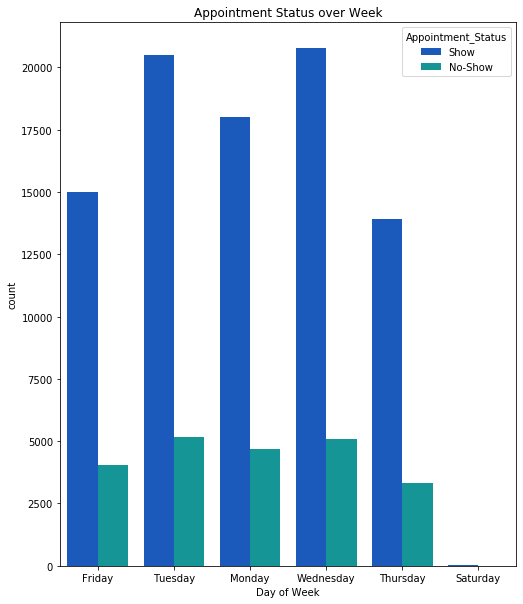

In [27]:
fig1 = plt.figure(figsize=(18,10))
ax = fig1.add_subplot(1,2,1)
ax.set_title('Appointment Status over Week')
sns.countplot(x='Appointment_Day_of_Week',hue='Appointment_Status',data=medical_appointments,palette='winter',ax=ax)
ax.set_xlabel('Day of Week')

plt.tight_layout
plt.show()

#### More number of people showed up on Tuesday and Wednesday
#### For the remaining days less number of people showed up for the appointment

### 5. Medical Condition based on Pattern


### 5.1 Analysis on patients with different medical conditions based on Appointment Day of Week

In [28]:
table1 = medical_appointments.pivot_table(values=['Diabetes','Alcoholism','Hypertension','Handicap'],columns='Appointment_Status',index=['Appointment_Day_of_Week'],aggfunc=np.sum)
medical_condition_data = table1.unstack().unstack('Appointment_Status').reset_index().rename(columns={"level_0":"Category"})
medical_condition_data["Show-Up Rate"] = medical_condition_data['Show'] / (medical_condition_data['No-Show'] + medical_condition_data['Show'])
medical_condition_data

Appointment_Status,Category,Appointment_Day_of_Week,No-Show,Show,Show-Up Rate
0,Alcoholism,Friday,116,492,0.809211
1,Alcoholism,Monday,160,544,0.772727
2,Alcoholism,Saturday,0,2,1.000000
3,Alcoholism,Thursday,101,417,0.805019
4,Alcoholism,Tuesday,164,574,0.777778
5,Alcoholism,Wednesday,136,654,0.827848
6,Diabetes,Friday,287,1176,0.803828
7,Diabetes,Monday,328,1243,0.791216
8,Diabetes,Saturday,2,5,0.714286
9,Diabetes,Thursday,202,1001,0.832086


In [29]:
Diabetes = medical_condition_data[medical_condition_data['Category'] == 'Diabetes']
Handicap = medical_condition_data[medical_condition_data['Category'] == 'Handicap']
Hypertension = medical_condition_data[medical_condition_data['Category'] == 'Hypertension']
Alcoholism = medical_condition_data[medical_condition_data['Category'] == 'Alcoholism']

plot1 = go.Scatter(
    x= Diabetes['Appointment_Day_of_Week'],
    y= Diabetes['Show'],
    mode= 'lines+markers',
    text= Diabetes['Category'],
    name="Diabetes")

plot2 = go.Scatter(
    x= Alcoholism['Appointment_Day_of_Week'],
    y= Alcoholism['Show'],
    mode= 'lines+markers',
    text= Alcoholism['Category'],
    name="Alcoholism")

plot3 = go.Scatter(
    x= Handicap['Appointment_Day_of_Week'],
    y= Handicap['Show'],
    mode= 'lines+markers',
    text= Handicap['Category'],
    name='Handcap')

plot4 = go.Scatter(
    x= Hypertension['Appointment_Day_of_Week'],
    y= Hypertension['Show'],
    mode= 'lines+markers',
    text= Hypertension['Category'],
    name='Hypertension')

layout = dict(title = "Show for the Appointment based on Medical Condition",hovermode='closest',xaxis=dict({"title":"Appointment_Day_of_Week"}),
             yaxis=dict({"title":"No of Show-Up"}))
dat = [plot1,plot2,plot3,plot4]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='basic-line')

#### Patients having different medical conditions display Show to appointment in a similar pattern.
#### Patients with Diabetes and Hypertension form large amount of data

### 5.2. Analysis of patients with different medical conditions showing different Show-Up rate over day of week.
#### As handicapped patients may need assistance to visit the doctor so my assumption is their rate might be less.
#### Alcoholic people due to their irregular habits might miss up appointments is my assumption.

In [30]:
plot1 = go.Scatter(
    x= Diabetes['Appointment_Day_of_Week'],
    y=Diabetes['Show-Up Rate'],
    mode= 'lines+markers',
    text=Diabetes['Category'],
    name="Diabetes")

plot2 = go.Scatter(
    x= Alcoholism['Appointment_Day_of_Week'],
    y=Alcoholism['Show-Up Rate'],
    mode= 'lines+markers',
    text=Alcoholism['Category'],
    name="Alcoholism")

plot3 = go.Scatter(
    x= Handicap['Appointment_Day_of_Week'],
    y=Handicap['Show-Up Rate'],
    mode= 'lines+markers',
    text=Handicap['Category'],
    name='Handicap')

plot4 = go.Scatter(
    x= Hypertension['Appointment_Day_of_Week'],
    y=Hypertension['Show-Up Rate'],
    mode= 'lines+markers',
    text=Hypertension['Category'],
    name='Hypertension')

layout = dict(title = "Show Up rate for the Appointment based on Medical Condition",hovermode='closest',xaxis=dict({"title":"Appointment_Day_of_Week"}),
             yaxis=dict({"title":"Show-Up Rate"}))
dat = [plot1,plot2,plot3,plot4]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='basic-line')

#### Alcoholics and Handicapped show lower Show-Up rate on Tuesday, Wednesday and Thursday while highest rate on Saturday.
#### Patients with Diabetes and Hypertension have low show-up rate on saturday.

### 5.3  Show up rate based on Gender

#### From the past analysis male and female populations have similar rate of show-up. 
#### They might show similar show-up rate among different medical conditions.

In [31]:
table2 = medical_appointments.pivot_table(values=['Diabetes','Alcoholism','Hypertension','Handicap'],columns='Appointment_Status',index=['Gender'],aggfunc=np.sum)
gender_based_data = table2.unstack().unstack('Appointment_Status').reset_index().rename(columns={'level_0':'Category'})
gender_based_data['Show-Up Rate'] = gender_based_data['Show'] / (gender_based_data['No-Show'] + gender_based_data['Show'])
gender_based_data

Appointment_Status,Category,Gender,No-Show,Show,Show-Up Rate
0,Alcoholism,F,308,915,0.748160
1,Alcoholism,M,369,1768,0.827328
2,Diabetes,F,1017,4589,0.818587
3,Diabetes,M,413,1924,0.823278
4,Handicap,F,268,1132,0.808571
5,Handicap,M,182,871,0.827160
6,Hypertension,F,2657,12681,0.826770
7,Hypertension,M,1115,5347,0.827453


In [32]:
male_data = gender_based_data[gender_based_data['Gender'] == 'M']
female_data = gender_based_data[gender_based_data['Gender'] == 'F']
plot1 = go.Bar(
    x= male_data['Category'],
    y= male_data['Show-Up Rate'],
    text= male_data['Gender'],
    name="Male")

plot2 = go.Bar(
    x= female_data['Category'],
    y= female_data['Show-Up Rate'],
    text= female_data['Gender'],
    name= "Female")

layout = dict(title = "Show-Up rate by Gender",barmode='group',xaxis=dict({"title":"Medical Condition"}),
             yaxis=dict({"title":"Rate"}))
dat = [plot1,plot2]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='grouped-bar')

#### Show up rate is higher for males with Alcoholism, Diabetes and Handicap as compared with female appointment show up rate
#### Patients with Hypertension have similar show up rates with respect to gender

### 5.4  Show up rate based on Medical Conditions and Age

In [33]:
table3 = medical_appointments.pivot_table(values=['Diabetes','Alcoholism','Hypertension','Handicap'],columns='Appointment_Status',index=['Age'],aggfunc=np.sum)
age_based_data = table3.unstack().unstack('Appointment_Status').reset_index().rename(columns={'level_0':'Category'})
age_based_data['Show-Up Rate'] = age_based_data['Show'] / (age_based_data['No-Show'] + age_based_data['Show'])
age_based_data = age_based_data[age_based_data['Show-Up Rate'].notna()]
age_based_data

Appointment_Status,Category,Age,No-Show,Show,Show-Up Rate
4,Alcoholism,4,0.0,1.0,1.000000
5,Alcoholism,5,1.0,0.0,0.000000
7,Alcoholism,7,0.0,2.0,1.000000
8,Alcoholism,8,0.0,1.0,1.000000
11,Alcoholism,11,0.0,1.0,1.000000
...,...,...,...,...,...
394,Hypertension,94,4.0,21.0,0.840000
395,Hypertension,95,5.0,5.0,0.500000
396,Hypertension,96,1.0,11.0,0.916667
397,Hypertension,97,2.0,6.0,0.750000


In [34]:
alcoholism = age_based_data[age_based_data['Category'] == 'Alcoholism']
hypertension = age_based_data[age_based_data['Category'] == 'Hypertension']
diabetes = age_based_data[age_based_data['Category'] == 'Diabetes']
handicap = age_based_data[age_based_data['Category'] == 'Handicap']

plot1 = go.Bar(
    x= alcoholism['Age'],
    y= alcoholism['Show-Up Rate'],
    text= alcoholism['Age'],
    name="Age")

layout = dict(title = "Show-Up rate by Age based on alcoholism",barmode='group',xaxis=dict({"title":"Age"}),
             yaxis=dict({"title":"Rate"}))
dat = [plot1]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='grouped-bar')

In [35]:
plot2 = go.Bar(
    x= hypertension['Age'],
    y= hypertension['Show-Up Rate'],
    text= hypertension['Age'],
    name="Age")

layout = dict(title = "Show-Up rate by Age based on hypertension",barmode='group',xaxis=dict({"title":"Age"}),
             yaxis=dict({"title":"Rate"}))
dat = [plot2]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='grouped-bar')

In [36]:
plot3 = go.Bar(
    x= diabetes['Age'],
    y= diabetes['Show-Up Rate'],
    text= diabetes['Age'],
    name="Age")

layout = dict(title = "Show-Up rate by Age based on diabetes",barmode='group',xaxis=dict({"title":"Age"}),
             yaxis=dict({"title":"Rate"}))
dat = [plot3]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='grouped-bar')

In [37]:
plot4 = go.Bar(
    x= handicap['Age'],
    y= handicap['Show-Up Rate'],
    text= handicap['Age'],
    name="Age")

layout = dict(title = "Show-Up rate by Age based on handicap",barmode='group',xaxis=dict({"title":"Age"}),
             yaxis=dict({"title":"Rate"}))
dat = [plot4]
fig = go.Figure(data=dat,layout=layout)
iplot(fig,filename='grouped-bar')

### 6. Correlation between Medical Conditions

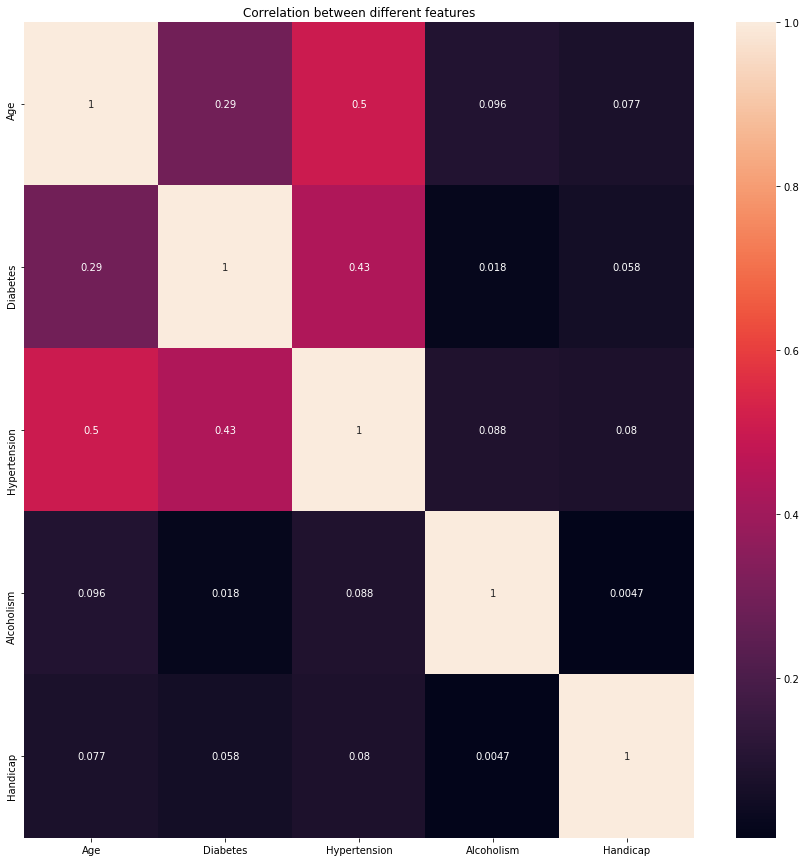

In [38]:
correlation_matrix = medical_appointments[['Gender', 'Age','Diabetes','Hypertension','Alcoholism','Handicap']].corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation between different features')
plt.show()

### 7. Analysis how sending SMS affects show or No-Show ratio?

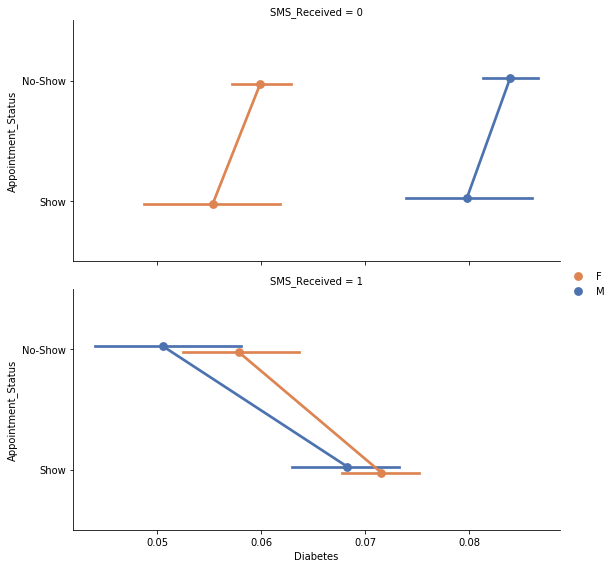

In [39]:
# Analysis of appointments for patients having diabetes and received SMS relation
plot = sns.FacetGrid(medical_appointments, row='SMS_Received', height=4, aspect=2)
plot.map(sns.pointplot, 'Diabetes', 'Appointment_Status', 'Gender', palette='deep', dodge=True)
plot.add_legend();

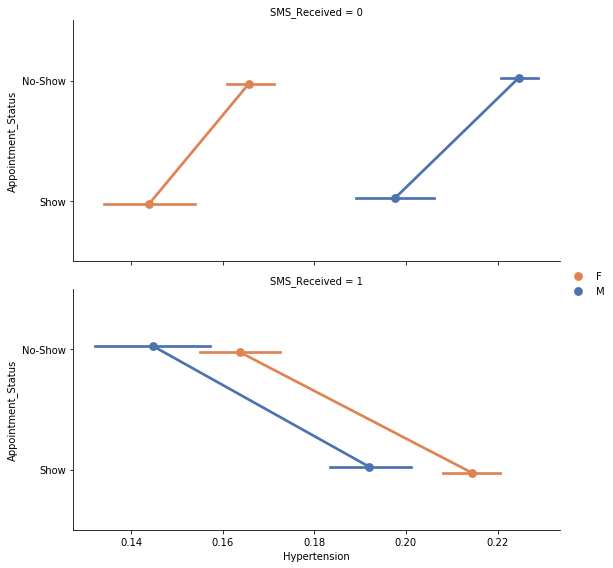

In [40]:
# Analysis of appointments for patients having hypertension and received SMS relation
plot = sns.FacetGrid(medical_appointments, row='SMS_Received', height=4, aspect=2)
plot.map(sns.pointplot, 'Hypertension', 'Appointment_Status', 'Gender', palette='deep', dodge=True)
plot.add_legend();

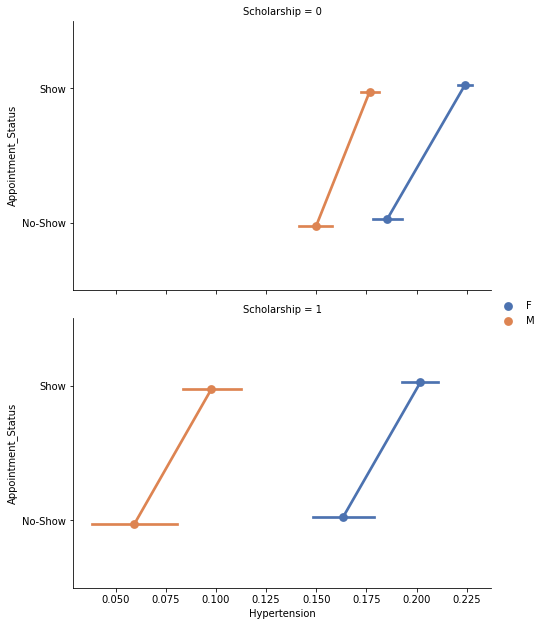

In [41]:
# Analysis of appointments for patients having hypertension and scholarship
plot = sns.FacetGrid(medical_appointments, row='Scholarship', height=4.4, aspect=1.6)
plot.map(sns.pointplot, 'Hypertension', 'Appointment_Status', 'Gender', palette='deep', dodge=True)
plot.add_legend();

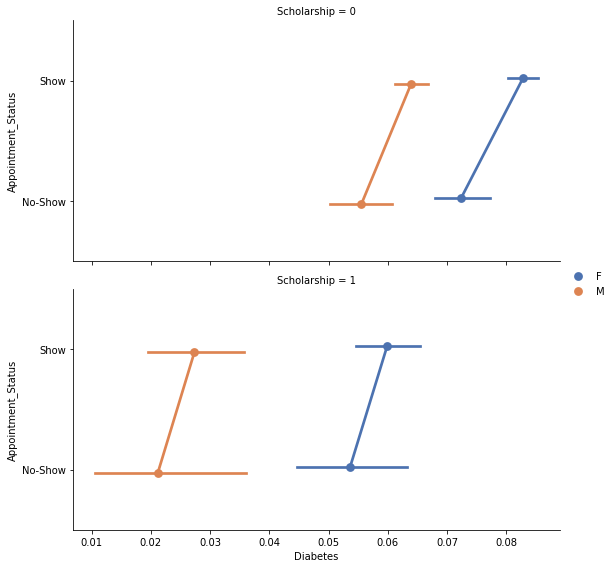

In [42]:
# Analysis of appointments for patients having diabetes and scholarship
plot = sns.FacetGrid(medical_appointments, row='Scholarship', height=4, aspect=2)
plot.map(sns.pointplot, 'Diabetes', 'Appointment_Status', 'Gender', palette='deep', dodge=True)
plot.add_legend();

### Conclusions
#### I have analyzed dataset and have cleaned the data by renaming columns, removing unnecessary data, adding features based on current data.
#### I have performed analysis on most of the independent variables and observed some relation between them and dependent variable Appointment_Status.
#### Many potential correlation remain uncovered as this was exploratory analysis.
#### The dataset can be investigated for statistical analysis for more insights and advanced correlations.
#### 1. Among all the medical appointment details nearly 20% of the patients do nto show up for appointment.
#### 2. Number of appointments by female patients are more than male patients and nearly 20% of both male as well as females did not show up for appointments.
#### 3. No-Show Probability has decreasing trend as the age increases. Young adults have high rate of No-Show as compared to old adults.
#### 4. No-Show probability is less when the waiting days are less than 25.
#### 5. More number of people showed up for an appointment on Tuesday and Wednesday. For the remaining days less number of people showed up for the appointment.
#### 6. Patients having different medical conditions display Show to appointment in a similar pattern.
#### 7. Alcoholics and Handicapped show lower Show-Up rate on Tuesday, Wednesday and Thursday while highest rate on Saturday.
#### 8. Patients with Diabetes and Hypertension have low show-up rate on saturday.
#### 9. Show up rate is higher for males with Alcoholism, Diabetes and Handicap as compared with female appointment show up rate.
#### 10. Patients with Hypertension have similar show up rates with respect to gender.
#### 11. Hypertension and Diabetes are moderately positive correlated with age.
#### 12. Hypertension and Diabetes have moderately positive correlation. Other variables have weak correlation.


### Restrictions:
#### The medical data was provided for April, May and June months. The data for an year could have provided more insights.
#### Appointment time was not provided which would have provided more insights.